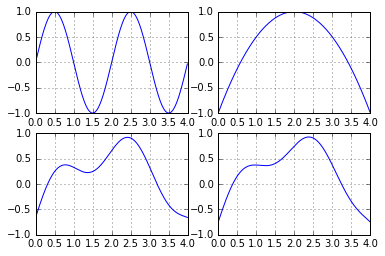

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

t = np.arange(0,4,.01)

# Our two source signals
s1 = np.sin(np.pi*t)
s2 = -.5*t*t+2*t-1

# Our combination signals
s3 = .25*s1 + .75*s2
s4 = .33*s1 + .66*s2

# Tell iPython to include plots inline in the notebook
%matplotlib inline

fig = plt.figure(1)

ax1 = fig.add_subplot(221)
ax1.plot(t, s1)
ax1.grid(True)
ax1.set_ylim((-1,1))

ax2 = fig.add_subplot(222)
ax2.plot(t, s2)
ax2.grid(True)
ax2.set_ylim((-1,1))

ax3 = fig.add_subplot(223)
ax3.plot(t, s4)
ax3.grid(True)
ax3.set_ylim((-1,1))

ax4 = fig.add_subplot(224)
ax4.plot(t, s3)
ax4.grid(True)
ax4.set_ylim((-1,1))

plt.show()

(-0.1, 0.1)

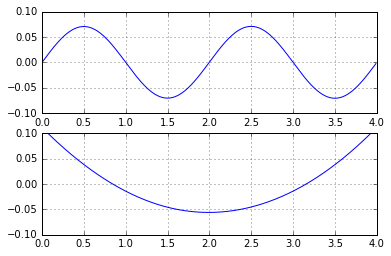

In [2]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

data = np.c_[s3,s4]

#print data

sc = StandardScaler()
data2 =  sc.fit_transform(data)

ica = FastICA()
data2_ = ica.fit_transform(data2)
mix = ica.mixing_

fig = plt.figure(2)

ax1 = fig.add_subplot(211)
ax1.plot(t, data2_.T[0])
ax1.grid(True)
ax1.set_ylim((-.1,.1))

ax2 = fig.add_subplot(212)
ax2.plot(t, data2_.T[1])
ax2.grid(True)
ax2.set_ylim((-.1,.1))



In [4]:
def normalizeForReadability(v):
    return v * (100. /(np.absolute(v[0])+np.absolute(v[1])))

print "Unmixing Matrix:"
print np.apply_along_axis(normalizeForReadability, 1, ica.components_)
print "Mixing Matrix:"
print np.apply_along_axis(normalizeForReadability, 1, ica.mixing_)

Unmixing Matrix:
[[-48.03519504  51.96480496]
 [-58.05184735  41.94815265]]
Mixing Matrix:
[[ 28.50829054 -71.49170946]
 [ 37.38227497 -62.61772503]]
